# ماشین لرنینگ

## فصل رگرسیون خطی

### قسمت اول



In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [847]:
url = 'https://raw.githubusercontent.com/Reza18GG/huose_price_tehran/refs/heads/main/data/HomeTehran.csv'
df = pd.read_csv(url)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [848]:
df.duplicated().sum()

np.int64(208)

In [849]:
df.drop_duplicates(inplace=True)

In [850]:
df.describe()

,Room,Price,Price(USD)
count,3271.000000,3.271000e+03,3.271000e+03
mean,2.086518,5.455162e+09,1.818387e+05
std,0.763165,8.244387e+09,2.748129e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.419500e+09,4.731667e+04
50%,2.000000,2.960000e+09,9.866667e+04
75%,2.000000,6.132000e+09,2.044000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3271 non-null   object 
 1   Room        3271 non-null   int64  
 2   Parking     3271 non-null   bool   
 3   Warehouse   3271 non-null   bool   
 4   Elevator    3271 non-null   bool   
 5   Address     3248 non-null   object 
 6   Price       3271 non-null   float64
 7   Price(USD)  3271 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 162.9+ KB


In [852]:
df['Area'] = df['Area'].astype(str).str.replace(",", "").str.strip().astype(np.int64)
for i in df.columns:
    if i == "Address":
        continue
    df[i] = df[i].astype(np.int64)

In [853]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        3271 non-null   int64 
 1   Room        3271 non-null   int64 
 2   Parking     3271 non-null   int64 
 3   Warehouse   3271 non-null   int64 
 4   Elevator    3271 non-null   int64 
 5   Address     3248 non-null   object
 6   Price       3271 non-null   int64 
 7   Price(USD)  3271 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 230.0+ KB


## روش زیر رو از تو گیت هاب دیدم و برداشتم ازش خوشم اومد

In [854]:
df_mapping = df["Address"].value_counts().to_dict()
df["Address"] = df["Address"].map(df_mapping)

In [855]:
df.duplicated().sum()

np.int64(0)

In [856]:
df.isna().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0
Price(USD),0


<Axes: >

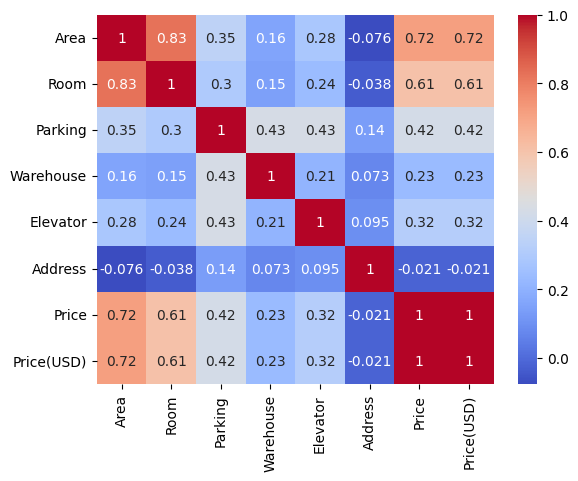

In [857]:
corr = df.corr("spearman")
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [858]:
df.dropna(inplace=True)

In [859]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [860]:
X

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,1,1,1,123.0,61666
1,60,1,1,1,1,123.0,61666
2,79,2,1,1,1,123.0,18333
3,95,2,1,1,1,66.0,30083
4,123,2,1,1,1,57.0,233333
...,...,...,...,...,...,...,...
3473,63,1,1,1,0,37.0,63000
3474,86,2,1,1,1,86.0,116666
3475,83,2,1,1,1,67.0,226666
3477,105,2,1,1,1,13.0,186666


In [861]:
sacler = StandardScaler()
X = sacler.fit_transform(X)

In [862]:
Y = np.log1p(Y)

In [863]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [865]:
model_knr = KNeighborsRegressor()
model_knr.fit(X_train, Y_train)

KNeighborsRegressor()

In [866]:
Y_pred_train = model_knr.predict(X_train)
Y_pred_test = model_knr.predict(X_test)

In [867]:
print(f"This Is a Mean Absolute ERROR Train: {mean_absolute_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Absolute ERROR Test: {mean_absolute_error(Y_test, Y_pred_test)}")

This Is a Mean Absolute ERROR Train: 0.09588481154558548
This Is a Mean Absolute ERROR Test: 0.13608909654189097


In [868]:
print(f"This Is a Mean Squared ERROR Train: {mean_squared_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Squared ERROR Test: {mean_squared_error(Y_test, Y_pred_test)}")

This Is a Mean Squared ERROR Train: 0.05154508179473635
This Is a Mean Squared ERROR Test: 0.08054943744363022


In [869]:
print(f"This Is a R2 Train: {r2_score(Y_train, Y_pred_train)}")
print(f"This Is a R2 Test: {r2_score(Y_test, Y_pred_test)}")

This Is a R2 Train: 0.957335882832719
This Is a R2 Test: 0.9340762384997019


In [871]:
model_svr = SVR()
model_svr.fit(X_train, Y_train)

SVR()

In [872]:
Y_pred_train = model_knr.predict(X_train)
Y_pred_test = model_knr.predict(X_test)

In [873]:
print(f"This Is a Mean Absolute ERROR Train: {mean_absolute_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Absolute ERROR Test: {mean_absolute_error(Y_test, Y_pred_test)}")

This Is a Mean Absolute ERROR Train: 0.09588481154558548
This Is a Mean Absolute ERROR Test: 0.13608909654189097


In [874]:
print(f"This Is a Mean Squared ERROR Train: {mean_squared_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Squared ERROR Test: {mean_squared_error(Y_test, Y_pred_test)}")

This Is a Mean Squared ERROR Train: 0.05154508179473635
This Is a Mean Squared ERROR Test: 0.08054943744363022


In [875]:
print(f"This Is a R2 Train: {r2_score(Y_train, Y_pred_train)}")
print(f"This Is a R2 Test: {r2_score(Y_test, Y_pred_test)}")

This Is a R2 Train: 0.957335882832719
This Is a R2 Test: 0.9340762384997019


In [877]:
model_bosst = XGBRegressor()
model_bosst.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [878]:
Y_pred_train = model_knr.predict(X_train)
Y_pred_test = model_knr.predict(X_test)

In [879]:
print(f"This Is a Mean Absolute ERROR Train: {mean_absolute_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Absolute ERROR Test: {mean_absolute_error(Y_test, Y_pred_test)}")

This Is a Mean Absolute ERROR Train: 0.09588481154558548
This Is a Mean Absolute ERROR Test: 0.13608909654189097


In [880]:
print(f"This Is a Mean Squared ERROR Train: {mean_squared_error(Y_train, Y_pred_train)}")
print(f"This Is a Mean Squared ERROR Test: {mean_squared_error(Y_test, Y_pred_test)}")

This Is a Mean Squared ERROR Train: 0.05154508179473635
This Is a Mean Squared ERROR Test: 0.08054943744363022


In [881]:
print(f"This Is a R2 Train: {r2_score(Y_train, Y_pred_train)}")
print(f"This Is a R2 Test: {r2_score(Y_test, Y_pred_test)}")

This Is a R2 Train: 0.957335882832719
This Is a R2 Test: 0.9340762384997019
